In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,LSTM,RepeatVector,TimeDistributed,Bidirectional
#from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras. preprocessing import sequence
from operator import itemgetter
from re import L
from sklearn.preprocessing import LabelEncoder
#from keras.utils import get_sequences
import pickle




In [12]:
data = pd.read_pickle("/content/drive/MyDrive/hr(tuples).pkl")

In [231]:
####hunda_getter
#def getter(x):
#    if isinstance(x,tuple):
#        return itemgetter(0)(x)
#    else:
#        return x
#
##data = pd.read_pickle("hr(tuples).pkl")
#mask = data["Participant"] ==  22
#mask2 = data["Stage"] == "STIMULUS"
#mask3 = data["Target"]== "BASELINE"
##print(data.loc[ mask2,[*data.columns[2:500],*data.columns[-15:]]].applymap(lambda x:getter(x)))
##print(data.loc[mask2,[*data.columns[2:6292]]].applymap(lambda x:getter(x)))#xtrain->particpants hr values
##print(data.loc[mask2,"Target"])#ytrain-> target emo
#
#print(data.loc[mask2 , "Participant"].unique())
#

In [8]:
def getter(x):
    if isinstance(x,tuple):
        return itemgetter(0)(x)
    else:
        return x


In [410]:
##################################################################################
data

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,SURPRISE,ANGER,ENTHUSIASM,LIKING,FEAR,AMUSEMENT,SADNESS,VALENCE,AROUSAL,MOTIVATION
0,22,STIMULUS,"(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 406)",...,1,1,2,1,1,2,1,5,2,4
1,22,QUESTIONNAIRES,"(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)",...,1,1,2,1,1,2,1,5,2,4
2,22,WASHOUT,"(80, 749)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(79, 792)","(79, 792)",...,1,1,1,1,1,1,1,4,2,5
3,22,STIMULUS,"(81, 719)","(81, 719)","(81, 719)","(81, 719)","(81, 734)","(81, 734)","(81, 734)","(81, 734)",...,1,1,1,1,1,1,1,4,2,5
4,22,QUESTIONNAIRES,"(83, 702)","(82, 702)","(83, 702)","(83, 702)","(83, 702)","(82, 702)","(82, 702)","(82, 702)",...,1,1,1,1,1,1,1,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,64,STIMULUS,"(78, 516)","(78, 516)","(78, 516)","(78, 634)","(78, 634)","(78, 634)","(78, 634)","(78, 634)",...,1,1,3,1,1,1,1,5,2,6
1340,64,QUESTIONNAIRES,"(77, 799)","(77, 799)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)",...,1,1,3,1,1,1,1,5,2,6
1341,64,WASHOUT,"(0, 987)","(0, 987)","(0, 987)","(0, 987)","(-10, 987)","(-10, 987)","(-10, 987)","(-10, 987)",...,1,1,5,1,1,1,1,9,8,9
1342,64,STIMULUS,"(69, 829)","(68, 829)","(69, 829)","(69, 829)","(69, 829)","(69, 1248)","(68, 1248)","(68, 1248)",...,1,1,5,1,1,1,1,9,8,9


In [9]:
df = data.iloc[: ,:-12]

In [412]:
df

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,22,STIMULUS,"(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 406)",...,None,None,None,None,None,None,None,None,None,BASELINE
1,22,QUESTIONNAIRES,"(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)",...,None,None,None,None,None,None,None,None,None,BASELINE
2,22,WASHOUT,"(80, 749)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(79, 792)","(79, 792)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
3,22,STIMULUS,"(81, 719)","(81, 719)","(81, 719)","(81, 719)","(81, 734)","(81, 734)","(81, 734)","(81, 734)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
4,22,QUESTIONNAIRES,"(83, 702)","(82, 702)","(83, 702)","(83, 702)","(83, 702)","(82, 702)","(82, 702)","(82, 702)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,64,STIMULUS,"(78, 516)","(78, 516)","(78, 516)","(78, 634)","(78, 634)","(78, 634)","(78, 634)","(78, 634)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1340,64,QUESTIONNAIRES,"(77, 799)","(77, 799)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1341,64,WASHOUT,"(0, 987)","(0, 987)","(0, 987)","(0, 987)","(-10, 987)","(-10, 987)","(-10, 987)","(-10, 987)",...,None,None,None,None,None,None,None,None,None,AWE
1342,64,STIMULUS,"(69, 829)","(68, 829)","(69, 829)","(69, 829)","(69, 829)","(69, 1248)","(68, 1248)","(68, 1248)",...,None,None,None,None,None,None,None,None,None,AWE


In [306]:
mask = data["Stage"] == "STIMULUS"
mask2 =data["Stage"] == "QUESTIONNAIRES"
mask3 = data["Stage"] == "WASHOUT"
hr_df = df.loc[mask , [*data.columns[0:6293]]].applymap(lambda x:getter(x))
#hr_df=df[0:6293].applymap(lambda x:getter(x))

In [307]:
hr_df

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,22,STIMULUS,87,87,87,87,87,87,87,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BASELINE
3,22,STIMULUS,81,81,81,81,81,81,81,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
6,22,STIMULUS,85,85,85,85,85,86,86,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWE
9,22,STIMULUS,85,86,85,86,85,85,85,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISGUST
12,22,STIMULUS,83,83,83,83,83,82,83,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SURPRISE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,64,STIMULUS,78,79,79,79,78,79,79,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEAR
1333,64,STIMULUS,77,77,77,77,77,77,77,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMUSEMENT
1336,64,STIMULUS,97,97,97,97,97,97,97,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SADNESS
1339,64,STIMULUS,78,78,78,78,78,78,78,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL


In [308]:
hr_df.fillna(0,inplace=True)

In [309]:
#hr_df=hr_df.drop(hr_df.index[1341])
#hr_df=hr_df.drop(hr_df.index[1338])

In [264]:
hr_df=hr_df.iloc[: , 2:]
#

In [295]:
hr_df

,Participant,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,22,STIMULUS,87,87,87,87,87,87,87,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BASELINE
3,22,STIMULUS,81,81,81,81,81,81,81,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEUTRAL
6,22,STIMULUS,85,85,85,85,85,86,86,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AWE
9,22,STIMULUS,85,86,85,86,85,85,85,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DISGUST
12,22,STIMULUS,83,83,83,83,83,82,83,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SURPRISE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,64,STIMULUS,78,79,79,79,78,79,79,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FEAR
1333,64,STIMULUS,77,77,77,77,77,77,77,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AMUSEMENT
1336,64,STIMULUS,97,97,97,97,97,97,97,98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SADNESS
1339,64,STIMULUS,78,78,78,78,78,78,78,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEUTRAL


In [266]:
label_encoder = LabelEncoder ()

In [267]:
hr_df["Target"]=label_encoder.fit_transform(hr_df["Target"])

In [268]:
y = hr_df['Target']
x = hr_df.drop('Target', axis = 1)

In [269]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 121, stratify=y)

In [270]:
x_train,y_train,x_test,y_test=np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)

In [271]:
x_train,x_test=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)),np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [272]:
x_test.shape

(139, 6290, 1)

In [169]:
#############################

In [170]:
pickled_model_72 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved Model/model_BI(72.7).pkl', 'rb'))


In [171]:
pickled_model_70 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved Model/model_BI(70.5).pkl', 'rb'))


In [197]:
model_acc = pickled_model_72.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy : {round(model_acc, 3)*100} %")

Test Accuracy : 71.89999999999999 %


In [198]:
model_acc = pickled_model_70.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy : {round(model_acc, 3)*100} %")

Test Accuracy : 71.2 %


In [199]:
y_pred = pickled_model_72.predict(x_test)

5/5 [==============================] - 2s 467ms/step


In [200]:
pred_class_y=[]
for i in range(y_pred.shape[0]):
  pred_class_y.append(np.argmax(y_pred[:][i]))

In [201]:
pred_class_y=np.array(pred_class_y)

In [202]:
pred_class_y

array([ 0,  3,  2,  8,  3,  1,  0,  9,  1,  3,  5,  4,  0,  7,  4,  9,  2,
        9,  9, 10,  4,  1,  2,  0,  9,  8,  5,  2,  8,  7,  2,  7,  3,  9,
        3,  0,  9,  0,  8,  3,  7,  4,  4,  9,  0,  2,  0, 10,  9,  3,  9,
        3,  8, 10,  2,  9,  7,  8,  8,  3,  9,  0,  7,  9,  2,  2,  0,  9,
        8,  7,  0,  9,  8, 10,  6,  2,  0, 10,  4,  9,  4,  5,  0,  9,  4,
       10,  3,  7,  3, 10,  8,  8,  8,  1,  0, 10,  8,  9,  8,  8,  4,  0,
        4,  4, 10,  7,  0,  8, 10,  9,  0,  7,  7,  9,  2,  3,  9,  7,  2,
        4, 10,  0,  9,  4,  0,  9,  9,  9,  0,  4,  1,  0, 10,  8,  8, 10,
        9,  8,  5])

In [203]:
pred_class_y=label_encoder.inverse_transform(pred_class_y)

In [204]:
pred_class_y

array(['AMUSEMENT', 'BASELINE', 'AWE', 'NEUTRAL', 'BASELINE', 'ANGER',
       'AMUSEMENT', 'SADNESS', 'ANGER', 'BASELINE', 'ENTHUSIASM',
       'DISGUST', 'AMUSEMENT', 'LIKING', 'DISGUST', 'SADNESS', 'AWE',
       'SADNESS', 'SADNESS', 'SURPRISE', 'DISGUST', 'ANGER', 'AWE',
       'AMUSEMENT', 'SADNESS', 'NEUTRAL', 'ENTHUSIASM', 'AWE', 'NEUTRAL',
       'LIKING', 'AWE', 'LIKING', 'BASELINE', 'SADNESS', 'BASELINE',
       'AMUSEMENT', 'SADNESS', 'AMUSEMENT', 'NEUTRAL', 'BASELINE',
       'LIKING', 'DISGUST', 'DISGUST', 'SADNESS', 'AMUSEMENT', 'AWE',
       'AMUSEMENT', 'SURPRISE', 'SADNESS', 'BASELINE', 'SADNESS',
       'BASELINE', 'NEUTRAL', 'SURPRISE', 'AWE', 'SADNESS', 'LIKING',
       'NEUTRAL', 'NEUTRAL', 'BASELINE', 'SADNESS', 'AMUSEMENT', 'LIKING',
       'SADNESS', 'AWE', 'AWE', 'AMUSEMENT', 'SADNESS', 'NEUTRAL',
       'LIKING', 'AMUSEMENT', 'SADNESS', 'NEUTRAL', 'SURPRISE', 'FEAR',
       'AWE', 'AMUSEMENT', 'SURPRISE', 'DISGUST', 'SADNESS', 'DISGUST',
       'ENTHUSIASM', 'A

In [205]:
y_test=label_encoder.inverse_transform(y_test)

In [206]:
y_test

array(['FEAR', 'BASELINE', 'AWE', 'NEUTRAL', 'BASELINE', 'ANGER', 'FEAR',
       'ENTHUSIASM', 'ANGER', 'BASELINE', 'ENTHUSIASM', 'DISGUST',
       'AMUSEMENT', 'LIKING', 'DISGUST', 'SADNESS', 'AWE', 'AMUSEMENT',
       'SADNESS', 'SURPRISE', 'DISGUST', 'ENTHUSIASM', 'AWE', 'ANGER',
       'ENTHUSIASM', 'NEUTRAL', 'ENTHUSIASM', 'AWE', 'NEUTRAL', 'LIKING',
       'AWE', 'LIKING', 'BASELINE', 'ENTHUSIASM', 'BASELINE', 'AMUSEMENT',
       'SADNESS', 'AMUSEMENT', 'FEAR', 'BASELINE', 'LIKING', 'DISGUST',
       'DISGUST', 'AMUSEMENT', 'ANGER', 'AWE', 'ANGER', 'SURPRISE',
       'AMUSEMENT', 'BASELINE', 'SADNESS', 'BASELINE', 'AMUSEMENT',
       'SURPRISE', 'AWE', 'SADNESS', 'LIKING', 'NEUTRAL', 'NEUTRAL',
       'BASELINE', 'ANGER', 'ANGER', 'LIKING', 'ENTHUSIASM', 'AWE', 'AWE',
       'ANGER', 'SADNESS', 'FEAR', 'LIKING', 'AMUSEMENT', 'ENTHUSIASM',
       'FEAR', 'SURPRISE', 'FEAR', 'AWE', 'ANGER', 'SURPRISE', 'DISGUST',
       'ENTHUSIASM', 'DISGUST', 'ENTHUSIASM', 'AMUSEMENT', 'ANGER',
 

In [207]:
decoded = label_encoder.inverse_transform(hr_df["Target"])

In [208]:
target=[]
for i in range(11):
  target.append(decoded[i])


In [334]:
y_test.shape

(139,)

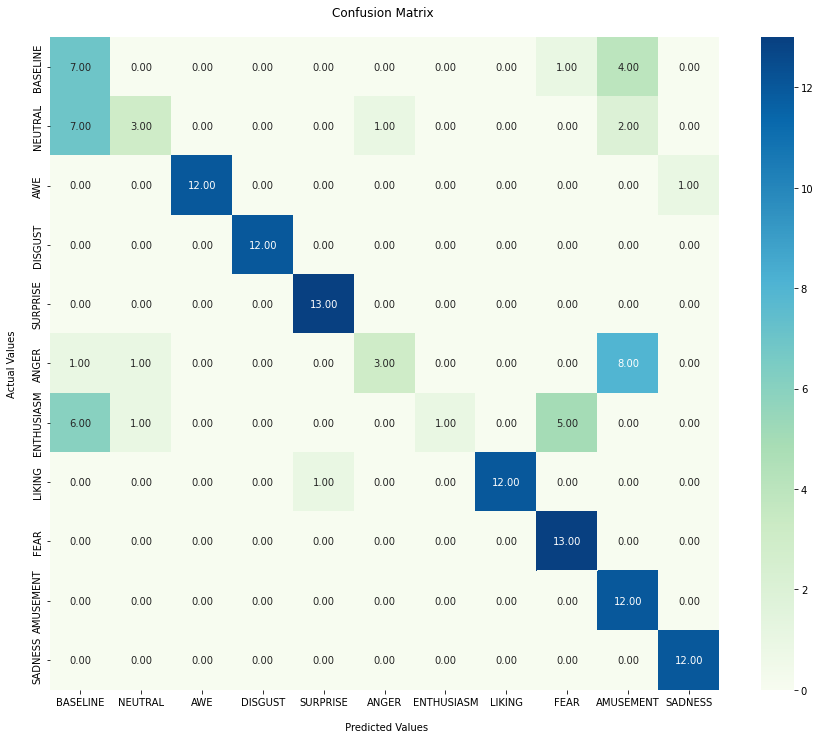

In [218]:
plt.figure(figsize=(15,12
                    ))
fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(target)
fx.yaxis.set_ticklabels(target)
plt.show()

In [210]:
#########################################

In [ ]:
####################################################

In [ ]:
##############################################################

In [141]:
##############################################################################QUESTIONNAIRES
x.shape

(462, 6290)

In [150]:
y_pred = pickled_model_72.predict(x)

15/15 [==============================] - 7s 457ms/step


In [151]:
pred_class_y=[]
for i in range(y_pred.shape[0]):
  pred_class_y.append(np.argmax(y_pred[:][i]))

In [152]:
pred_class_y=np.array(pred_class_y)

In [153]:
pred_class_y

array([ 3,  8,  2,  4, 10,  9,  9,  7,  0,  9,  9,  3,  2,  4, 10,  0,  9,
        7,  8,  9,  9,  8,  3,  4, 10,  0,  9,  7,  0,  0,  9,  8,  2,  3,
       10,  9,  9,  7,  0,  0,  9,  8,  2,  4,  3,  0,  9,  7,  8,  0,  9,
        8,  2,  4, 10,  3,  5,  7,  1,  5,  5,  8,  2,  4, 10,  5,  3,  7,
        0,  0,  9,  8,  2,  4, 10,  0,  5,  3,  0,  1,  9,  8,  2,  4, 10,
        0,  9,  7,  3,  9,  8,  2,  4, 10,  9,  9,  7,  8,  0,  3,  8,  2,
        4, 10,  0,  0,  7,  6,  0,  9,  3,  2,  4, 10,  0,  9,  7,  0,  0,
        9,  8,  3,  4, 10,  0,  9,  7,  0,  0,  9,  8,  2,  3, 10,  0,  5,
        7,  0,  9,  9,  8,  2,  4,  3,  0,  9,  7,  0,  0,  9,  8,  2,  4,
       10,  3,  5,  7,  0,  0,  5,  8,  2,  4, 10,  0,  3,  7,  0,  5,  9,
        8,  2,  4, 10,  0,  9,  3,  0,  9,  8,  2,  4, 10,  1,  9,  7,  0,
        3,  0,  9,  9,  8,  2,  4, 10,  9,  9,  7,  3,  9,  8,  2,  3, 10,
        1,  0,  7,  0,  0,  3,  8,  2,  4, 10,  9,  9,  7,  0,  9,  9,  3,
        2,  4, 10,  0,  9

In [154]:
pred_class_y=label_encoder.inverse_transform(pred_class_y)
y=label_encoder.inverse_transform(y)

In [155]:
decoded = label_encoder.inverse_transform(hr_df["Target"])
target=[]
for i in range(11):
  target.append(decoded[i])

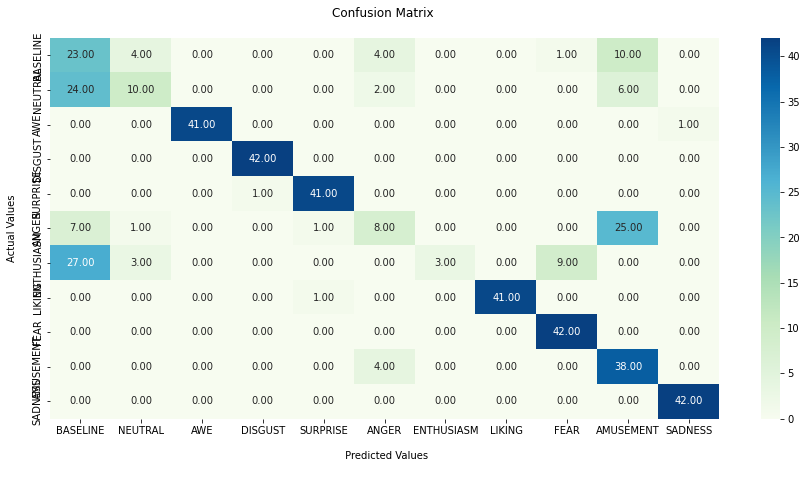

In [156]:
plt.figure(figsize=(15,7))
fx=sns.heatmap(confusion_matrix(y,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(target)
fx.yaxis.set_ticklabels(target)
plt.show()

In [118]:
#####################################washouut


In [119]:
y_pred = pickled_model_72.predict(x)

14/14 [==============================] - 9s 677ms/step


In [120]:
pred_class_y=[]
for i in range(y_pred.shape[0]):
  pred_class_y.append(np.argmax(y_pred[:][i]))

In [121]:
pred_class_y=np.array(pred_class_y)

In [122]:
pred_class_y=label_encoder.inverse_transform(pred_class_y)
y=label_encoder.inverse_transform(y)

In [126]:
decoded = label_encoder.inverse_transform(hr_df["Target"])
target=[]
for i in range(11):
  target.append(decoded[i])

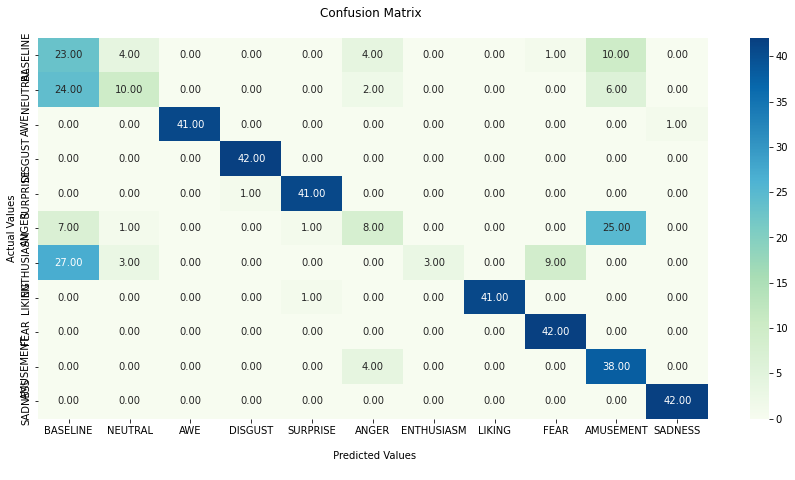

In [164]:
plt.figure(figsize=(15,7))
fx=sns.heatmap(confusion_matrix(y,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(target)
fx.yaxis.set_ticklabels(target)
plt.show()

In [ ]:
##############################################################################################

In [ ]:
#####################################################################################

In [ ]:
#BI_LSTM

In [275]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Flatten())
model.add (tf.keras.layers.Dense(units=11,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 6290, 100)        20800     
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 6290, 100)         0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 6290, 100)        60400     
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 6290, 100)         0         
                                                                 
 bidirectional_14 (Bidirecti  (None, 6290, 100)        60400     
 onal)                                                           
                                                      

In [64]:
#x_train, y_train = get_sequences(100, x_train.shape[1])

In [82]:
h= model.fit(
    x_train, 
    y_train,
    validation_split = 0.2,
    batch_size = 40,
    epochs = 50, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/50
7/7 [==============================] - 17s 1s/step - loss: 7.7294 - accuracy: 0.2984 - val_loss: 6.6693 - val_accuracy: 0.3077
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 4.2511 - accuracy: 0.4845 - val_loss: 4.4084 - val_accuracy: 0.3846
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 2.1542 - accuracy: 0.5620 - val_loss: 1.4198 - val_accuracy: 0.6000
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 1.3041 - accuracy: 0.6977 - val_loss: 1.2059 - val_accuracy: 0.6000
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.8499 - accuracy: 0.7248 - val_loss: 1.4220 - val_accuracy: 0.5846
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: 0.7576 - accuracy: 0.7403 - val_loss: 2.1748 - val_accuracy: 0.5231
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 0.8747 - accuracy: 0.7326 - val_loss: 1.6047 - val_accuracy: 0.5846
Epoch 8/50
7/7 [========================

In [83]:
model_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy : {round(model_acc, 3)*100} %")

Test Accuracy : 65.5 %


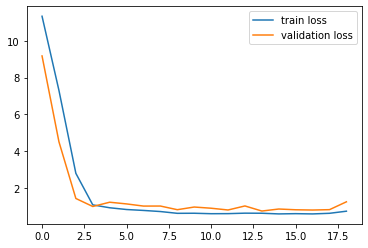

In [ ]:
plt.plot(h.history['loss'],label="train loss")
plt.plot(h.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

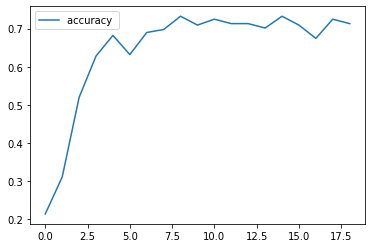

In [ ]:

plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

In [ ]:
pickle.dump(model, open('model_BI(72.7).pkl', 'wb'))

In [ ]:
def create_model():
 # create model
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(x_train.shape[1],1)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(Flatten())
  model.add (tf.keras.layers.Dense(units=11,activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
  return model

In [ ]:
#pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
#############################################################################################################################################

In [ ]:
#SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score,GridSearchCV


In [ ]:
reshaped_x_test=np.reshape(x_test,(139, 6290))
reshaped_x_train=np.reshape(x_train,(323, 6290))

In [ ]:
model_svm=svm.SVC(kernel='rbf',C=30,gamma='auto')
model_svm.fit(reshaped_x_train,y_train)
model_svm.score(reshaped_x_test,y_test)

0.460431654676259

In [ ]:
x.shape

(462, 6290)

In [ ]:
y.shape

(462,)

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),x,y,cv=5)

array([0.43010753, 0.55913978, 0.52173913, 0.45652174, 0.41304348])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),x,y,cv=5)

array([0.43010753, 0.55913978, 0.52173913, 0.45652174, 0.41304348])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=30,gamma='auto'),x,y,cv=5)

array([0.43010753, 0.55913978, 0.52173913, 0.45652174, 0.41304348])

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),x,y,cv=5)

array([0.66666667, 0.64516129, 0.66304348, 0.65217391, 0.66304348])

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=20,gamma='auto'),x,y,cv=5)

array([0.66666667, 0.64516129, 0.66304348, 0.65217391, 0.66304348])

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=30,gamma='auto'),x,y,cv=5)

array([0.66666667, 0.64516129, 0.66304348, 0.65217391, 0.66304348])

In [ ]:
g_svm=GridSearchCV(svm.SVC(gamma='auto'),{
    "C":[1,10,20,30,40,50],
    "kernel":['rbf','linear']
},cv=5,return_train_score=False)
g_svm.fit(x,y)
g_svm.cv_results_

{'mean_fit_time': array([0.71571302, 0.41147652, 0.73794284, 0.50805297, 0.70230312,
        0.39981141, 0.71096807, 0.4158987 , 0.79319596, 0.41617298,
        0.72305098, 0.39537282]),
 'std_fit_time': array([0.02228192, 0.02848944, 0.01829913, 0.12719966, 0.00426443,
        0.04058079, 0.01587216, 0.03382864, 0.11861631, 0.02802834,
        0.01249556, 0.02991988]),
 'mean_score_time': array([0.19776688, 0.09363017, 0.19250326, 0.14122133, 0.19638453,
        0.08985562, 0.19766326, 0.09121289, 0.2670526 , 0.09393358,
        0.19492764, 0.09455953]),
 'std_score_time': array([0.00640336, 0.00432925, 0.00237468, 0.06529858, 0.00900169,
        0.00162145, 0.0061583 , 0.00502242, 0.0921582 , 0.00906036,
        0.00768792, 0.0059679 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obje

In [ ]:
g_svm_df=pd.DataFrame(g_svm.cv_results_)

In [ ]:
g_svm_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.715713,0.022282,0.197767,0.006403,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.440860,0.580645,0.500000,0.369565,0.413043,0.460823,0.073351,12
1,0.411477,0.028489,0.093630,0.004329,1,linear,"{'C': 1, 'kernel': 'linear'}",0.666667,0.645161,0.663043,0.652174,0.663043,0.658018,0.008059,1
2,0.737943,0.018299,0.192503,0.002375,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.430108,0.559140,0.521739,0.456522,0.413043,0.476110,0.055594,7
3,0.508053,0.127200,0.141221,0.065299,10,linear,"{'C': 10, 'kernel': 'linear'}",0.666667,0.645161,0.663043,0.652174,0.663043,0.658018,0.008059,1
4,0.702303,0.004264,0.196385,0.009002,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.430108,0.559140,0.521739,0.456522,0.413043,0.476110,0.055594,7
5,0.399811,0.040581,0.089856,0.001621,20,linear,"{'C': 20, 'kernel': 'linear'}",0.666667,0.645161,0.663043,0.652174,0.663043,0.658018,0.008059,1
6,0.710968,0.015872,0.197663,0.006158,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.430108,0.559140,0.521739,0.456522,0.413043,0.476110,0.055594,7
7,0.415899,0.033829,0.091213,0.005022,30,linear,"{'C': 30, 'kernel': 'linear'}",0.666667,0.645161,0.663043,0.652174,0.663043,0.658018,0.008059,1
8,0.793196,0.118616,0.267053,0.092158,40,rbf,"{'C': 40, 'kernel': 'rbf'}",0.430108,0.559140,0.521739,0.456522,0.413043,0.476110,0.055594,7
9,0.416173,0.028028,0.093934,0.009060,40,linear,"{'C': 40, 'kernel': 'linear'}",0.666667,0.645161,0.663043,0.652174,0.663043,0.658018,0.008059,1


In [ ]:
g_svm_df[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.460823,12
1,1,linear,0.658018,1
2,10,rbf,0.476110,7
3,10,linear,0.658018,1
4,20,rbf,0.476110,7
5,20,linear,0.658018,1
6,30,rbf,0.476110,7
7,30,linear,0.658018,1
8,40,rbf,0.476110,7
9,40,linear,0.658018,1


In [ ]:
g_svm.best_params_

{'C': 1, 'kernel': 'linear'}

In [497]:
######################################################################################anmaly

In [239]:
df = data.iloc[: ,:-12]

In [240]:
df['Participant'].unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64])

In [241]:
mask = data["Stage"] == "STIMULUS"
df = df.loc[mask, [*df.columns[0:6293]]].applymap(lambda x:getter(x))

In [242]:
df.drop(['Stage'], axis = 1, inplace = True)

In [243]:
bas = df['Target']=='BASELINE'
df_bas = df.loc[bas, [*df.columns[0:6293]]]

In [244]:
emo = df['Target']=='BASELINE'
df_emo = df.loc[~emo, [*df.columns[0:6293]]]

In [245]:
df_emo

,Participant,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
3,22,81,81,81,81,81,81,81,81,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
6,22,85,85,85,85,85,86,86,86,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWE
9,22,85,86,85,86,85,85,85,85,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISGUST
12,22,83,83,83,83,83,82,83,83,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SURPRISE
15,22,78,78,78,78,78,78,78,78,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,64,78,79,79,79,78,79,79,79,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEAR
1333,64,77,77,77,77,77,77,77,77,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMUSEMENT
1336,64,97,97,97,97,97,97,97,98,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SADNESS
1339,64,78,78,78,78,78,78,78,78,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL


In [316]:
part = df_bas["Participant"] == 62
bas_62 = df_bas.loc[part, [*df_bas.columns[1:6293]]]
bas_62.drop(bas_62.iloc[:,1299:6290], axis=1, inplace=True)###[1299:6290]for traget###[1299:6291]witout target

In [317]:
bas_62

,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,2:8.630599000000018,2:8.73039,2:8.83018100000001,2:8.929971999999992,2:9.029763000000003,2:9.129554000000013,2:9.229344999999995,2:9.329136000000005,2:9.428927000000016,2:9.528717999999998
1248,105,105,105,105,105,105,105,105,105,105,...,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0


In [318]:
part = df_emo["Participant"] == 62
emo_62 = df_emo.loc[part, [*df_emo.columns[1:6293]]]
emo_62.drop(emo_62.iloc[:,1299:6290], axis=1, inplace=True)###[1299:6290]for traget###[1299:6291]witout target



In [319]:
emo_62

,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,2:8.73039,2:8.83018100000001,2:8.929971999999992,2:9.029763000000003,2:9.129554000000013,2:9.229344999999995,2:9.329136000000005,2:9.428927000000016,2:9.528717999999998,Target
1251,93,93,93,93,93,93,93,93,93,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
1254,95,95,95,95,95,95,95,95,95,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWE
1257,89,89,89,89,89,89,90,90,90,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISGUST
1260,91,91,91,91,91,91,91,91,91,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SURPRISE
1263,90,90,90,90,90,90,90,90,90,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANGER
1266,93,93,93,93,93,93,93,93,93,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENTHUSIASM
1269,98,98,98,98,98,98,98,98,98,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIKING
1272,91,91,91,91,91,91,91,91,91,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEAR
1275,90,90,90,91,90,90,91,90,90,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMUSEMENT
1278,88,87,88,88,88,87,87,87,86,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SADNESS


(0.0, 150.0)

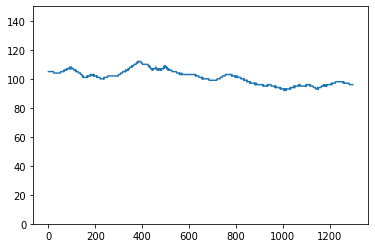

In [333]:
plt.plot(bas_62.values[:,:][0])
plt.ylim(0, 150)

In [143]:
bas_62=bas_62.transpose()

In [200]:
train=bas_62.copy()
test=train.copy()

In [203]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(train[[1248]])
train[1248]=scaler.transform(train[[1248]])
test[1248]=scaler.transform(test[[1248]])

In [207]:
train['time'] = train.index
train.reset_index(drop=True, inplace=True)
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
train=swap_columns(train,1248,'time')
train['time'] = ['00:'+x   for x in train['time']]
train['time'] = pd.to_timedelta(train['time'])

In [209]:
seq_size=50

def to_seq(x,y,seq_size=1):
  x_values=[]
  y_values=[]
  for i in range(len(x)-seq_size):
    x_values.append(x.iloc[i:(i+seq_size)].values)
    y_values.append(y.iloc[seq_size])
  return np.array(x_values),np.array(y_values)

trainx,trainy=to_seq(train[[1248]],train[1248],seq_size)

     

**LSTM** **Autoencoder**

In [214]:
model=Sequential()
model.add(LSTM(128,input_shape=(trainx.shape[1],trainx.shape[2]),return_sequences=False))
#model.add(LSTM(64,activation='relu',return_sequences=False))

model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainx.shape[1]))


#model.add(LSTM(64,activation='relu',return_sequences=True))

model.add(LSTM(128,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainx.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 50, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 50, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 50, 1)            129       
 ibuted)                                                

In [216]:
h=model.fit(trainx,trainy,epochs=20,batch_size=50,validation_split=0.1,verbose=1)


Epoch 1/20
23/23 [==============================] - 6s 255ms/step - loss: 0.0403 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 2/20
23/23 [==============================] - 5s 201ms/step - loss: 0.0364 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 3/20
23/23 [==============================] - 5s 219ms/step - loss: 0.0322 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 4/20
23/23 [==============================] - 5s 209ms/step - loss: 0.0303 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 5/20
23/23 [==============================] - 5s 200ms/step - loss: 0.0281 - accuracy: 0.0000e+00 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 6/20
23/23 [==============================] - 5s 208ms/step - loss: 0.0270 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 7/20
23/23 [==============================] - 5s 204ms/step - loss: 0.0241 - accuracy: 0.0000e

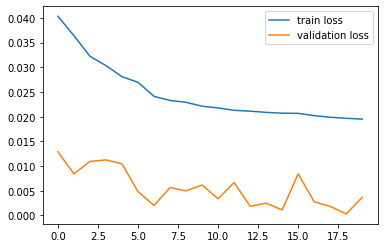

In [217]:
plt.plot(h.history['loss'],label="train loss")
plt.plot(h.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

40/40 [==============================] - 3s 58ms/step


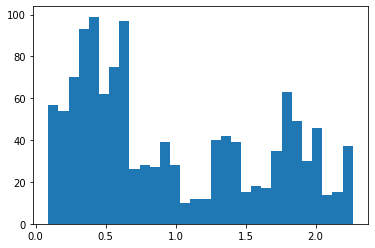

In [218]:
trainPredict = model.predict(trainx)
trainMAE = np.mean(np.abs(trainPredict - trainx), axis=1)
plt.hist(trainMAE, bins=30)


In [359]:
max_trainMAE =1
trainMAE = np.mean(np.abs(trainPredict - trainx), axis=1)
anomaly_df = pd.DataFrame(train[seq_size:])
anomaly_df['trainMAE'] = trainMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['trainMAE'] > anomaly_df['max_trainMAE']
anomaly_df[1248] = train[seq_size:][1248]

In [360]:
anomaly_df

,time,1248,trainMAE,max_trainMAE,anomaly
50,0 days 00:00:04.989550,0.632433,0.099424,1,False
51,0 days 00:00:05.089341,0.632433,0.095285,1,False
52,0 days 00:00:05.189132,0.839368,0.091147,1,False
53,0 days 00:00:05.288923,0.839368,0.091142,1,False
54,0 days 00:00:05.388714,0.839368,0.091145,1,False
...,...,...,...,...,...
1294,0 days 00:02:09.129554,-1.023044,1.424251,1,True
1295,0 days 00:02:09.229344999,-1.023044,1.432528,1,True
1296,0 days 00:02:09.329136,-1.023044,1.440805,1,True
1297,0 days 00:02:09.428927,-1.023044,1.449083,1,True


In [361]:
anomaly_df['anomaly'].value_counts()

False    750
True     499
Name: anomaly, dtype: int64

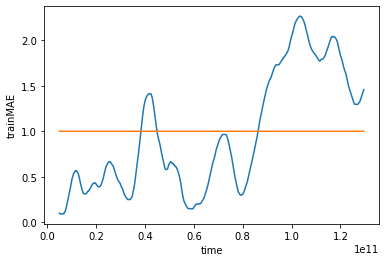

In [368]:
sns.lineplot(x=anomaly_df['time'], y=anomaly_df['trainMAE'])
sns.lineplot(x=anomaly_df['time'], y=anomaly_df['max_trainMAE'])

In [345]:
emo_62_fear=emo_62.loc[emo_62["Target"]=='FEAR']
emo_62_fear.drop(['Target'], axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [346]:
emo_62_fear

,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,2:8.630599000000018,2:8.73039,2:8.83018100000001,2:8.929971999999992,2:9.029763000000003,2:9.129554000000013,2:9.229344999999995,2:9.329136000000005,2:9.428927000000016,2:9.528717999999998
1272,91,91,91,91,91,91,91,91,91,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.0, 150.0)

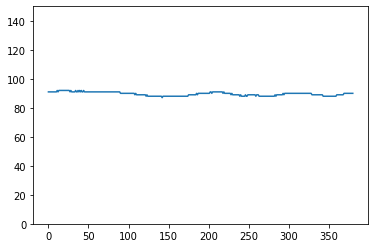

In [347]:
plt.plot(emo_62_fear.values[:,:][0])
plt.ylim(0, 150)

In [348]:
emo_62_fear=emo_62_fear.transpose()
scaler=scaler.fit(emo_62_fear[[1272]])
emo_62_fear[1272]=scaler.transform(emo_62_fear[[1272]])


In [349]:
emo_62_fear['time'] = emo_62_fear.index
emo_62_fear.reset_index(drop=True, inplace=True)
emo_62_fear=swap_columns(emo_62_fear,1272,'time')
emo_62_fear['time'] = ['00:'+x   for x in emo_62_fear['time']]
emo_62_fear['time'] = pd.to_timedelta(emo_62_fear['time'])

In [350]:
emo_62_fearx,emo_62_feary=to_seq(emo_62_fear[[1272]],emo_62_fear[1272],seq_size)

40/40 [==============================] - 2s 61ms/step


(array([24., 16., 28., 19., 10., 12., 11., 14., 22., 10., 10., 10., 10.,
         7., 11., 23.,  6.,  9.,  6.,  8.,  8.,  6., 11.,  8.,  3.,  4.,
         5.,  6.,  6.,  9.]),
 array([0.42979287, 0.47964434, 0.52949582, 0.57934729, 0.62919877,
        0.67905024, 0.72890172, 0.77875319, 0.82860467, 0.87845614,
        0.92830762, 0.97815909, 1.02801056, 1.07786204, 1.12771351,
        1.17756499, 1.22741646, 1.27726794, 1.32711941, 1.37697089,
        1.42682236, 1.47667384, 1.52652531, 1.57637679, 1.62622826,
        1.67607973, 1.72593121, 1.77578268, 1.82563416, 1.87548563,
        1.92533711]),
 <a list of 30 Patch objects>)

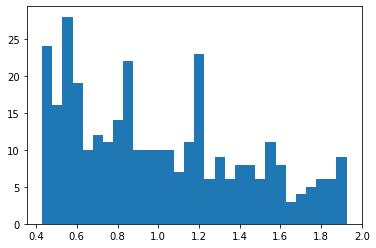

In [352]:
testPredict_fear = model.predict(emo_62_fearx)
trainMAE_fear = np.mean(np.abs(testPredict_fear- emo_62_fearx), axis=1)
plt.hist(trainMAE_fear, bins=30)

In [362]:
anomaly_df['trainMAE_fear'] = trainMAE_fear
anomaly_df['anomaly_fear'] = anomaly_df['trainMAE_fear'] > anomaly_df['max_trainMAE']
anomaly_df[1272] = emo_62_fear[seq_size:][1272]

In [363]:
anomaly_df

,time,1248,trainMAE,max_trainMAE,anomaly,trainMAE_fear,anomaly_fear,1272
50,0 days 00:00:04.989550,0.632433,0.099424,1,False,0.840122,False,1.13057
51,0 days 00:00:05.089341,0.632433,0.095285,1,False,0.840108,False,1.13057
52,0 days 00:00:05.189132,0.839368,0.091147,1,False,0.840097,False,1.13057
53,0 days 00:00:05.288923,0.839368,0.091142,1,False,0.840088,False,1.13057
54,0 days 00:00:05.388714,0.839368,0.091145,1,False,0.840080,False,1.13057
...,...,...,...,...,...,...,...,...
1294,0 days 00:02:09.129554,-1.023044,1.424251,1,True,NaN,False,NaN
1295,0 days 00:02:09.229344999,-1.023044,1.432528,1,True,NaN,False,NaN
1296,0 days 00:02:09.329136,-1.023044,1.440805,1,True,NaN,False,NaN
1297,0 days 00:02:09.428927,-1.023044,1.449083,1,True,NaN,False,NaN


In [364]:
anomaly_df['anomaly_fear'].value_counts()

False    1097
True      152
Name: anomaly_fear, dtype: int64

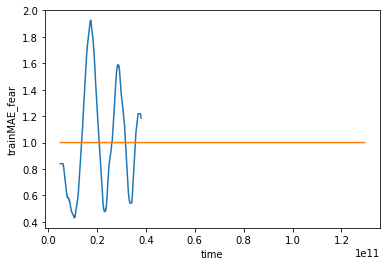

In [367]:
sns.lineplot(x=anomaly_df['time'], y=anomaly_df["trainMAE_fear"])
sns.lineplot(x=anomaly_df['time'], y=anomaly_df['max_trainMAE'])

In [369]:
get_ind=anomaly_df.copy()

In [370]:
get_ind['ind'] = get_ind.index
get_ind.reset_index(drop=True, inplace=True)

In [371]:
get_ind

,time,1248,trainMAE,max_trainMAE,anomaly,trainMAE_fear,anomaly_fear,1272,ind
0,0 days 00:00:04.989550,0.632433,0.099424,1,False,0.840122,False,1.13057,50
1,0 days 00:00:05.089341,0.632433,0.095285,1,False,0.840108,False,1.13057,51
2,0 days 00:00:05.189132,0.839368,0.091147,1,False,0.840097,False,1.13057,52
3,0 days 00:00:05.288923,0.839368,0.091142,1,False,0.840088,False,1.13057,53
4,0 days 00:00:05.388714,0.839368,0.091145,1,False,0.840080,False,1.13057,54
...,...,...,...,...,...,...,...,...,...
1244,0 days 00:02:09.129554,-1.023044,1.424251,1,True,NaN,False,NaN,1294
1245,0 days 00:02:09.229344999,-1.023044,1.432528,1,True,NaN,False,NaN,1295
1246,0 days 00:02:09.329136,-1.023044,1.440805,1,True,NaN,False,NaN,1296
1247,0 days 00:02:09.428927,-1.023044,1.449083,1,True,NaN,False,NaN,1297


In [372]:
anomalies = trainMAE_fear > max_trainMAE
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

Number of anomaly samples:  152
Indices of anomaly samples:  (array([ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 331]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 

In [467]:
#x=[22,46,51,60,64]
#b=np.array([81.618,
#88.033,
#87.855,
#91.217,
#71.71])
#n=np.array([81.784-b[0],
#84.569            -b[1],
#87.717            -b[2],
#92.750            -b[3],
#68.450            -b[4]])
#awe=np.array([81.629-n[0],
#87.165              -n[1],
#86.364              -n[2],
#90.886              -n[3],
#66.920              -n[4]])
#dis=np.array([82.611-awe[0],
#85.561              -awe[1],
#86.776              -awe[2],
#92.500              -awe[3],
#68.360              -awe[4]])
#surr=np.array([75.808-dis[0],
#86.227               -dis[1],
#83.338               -dis[2],
#95.374               -dis[3],
#69.480               -dis[4]])
#anger=np.array([77.117-surr[0],
#85.878                -surr[1],
#84.966                -surr[2],
#97.400                -surr[3],
#65.940                -surr[4]])
#enth=np.array([80.366-anger[0],
#84.954               -anger[1],
#85.189               -anger[2],
#88.758               -anger[3],
#76.230               -anger[4]])
#liking=np.array([79.017-enth[0],
#81.991                 -enth[1],
#81.892                 -enth[2],
#91.200                 -enth[3],
#72.990                 -enth[4]])
#fear=np.array([77.013-liking[0],
#85.454               -liking[1],
#81.985               -liking[2],
#93.320               -liking[3],
#79.730               -liking[4]])
#amusement=np.array([75.743-fear[0],
#79.869                    -fear[1],
#82.769                    -fear[2],
#91.812                    -fear[3],
#74.170                    -fear[4]])
#sad=np.array([74.589-sad[0],
#84.071              -sad[1],
#83.502              -sad[2],
#89.994              -sad[3],
#66.480              -sad[4],])

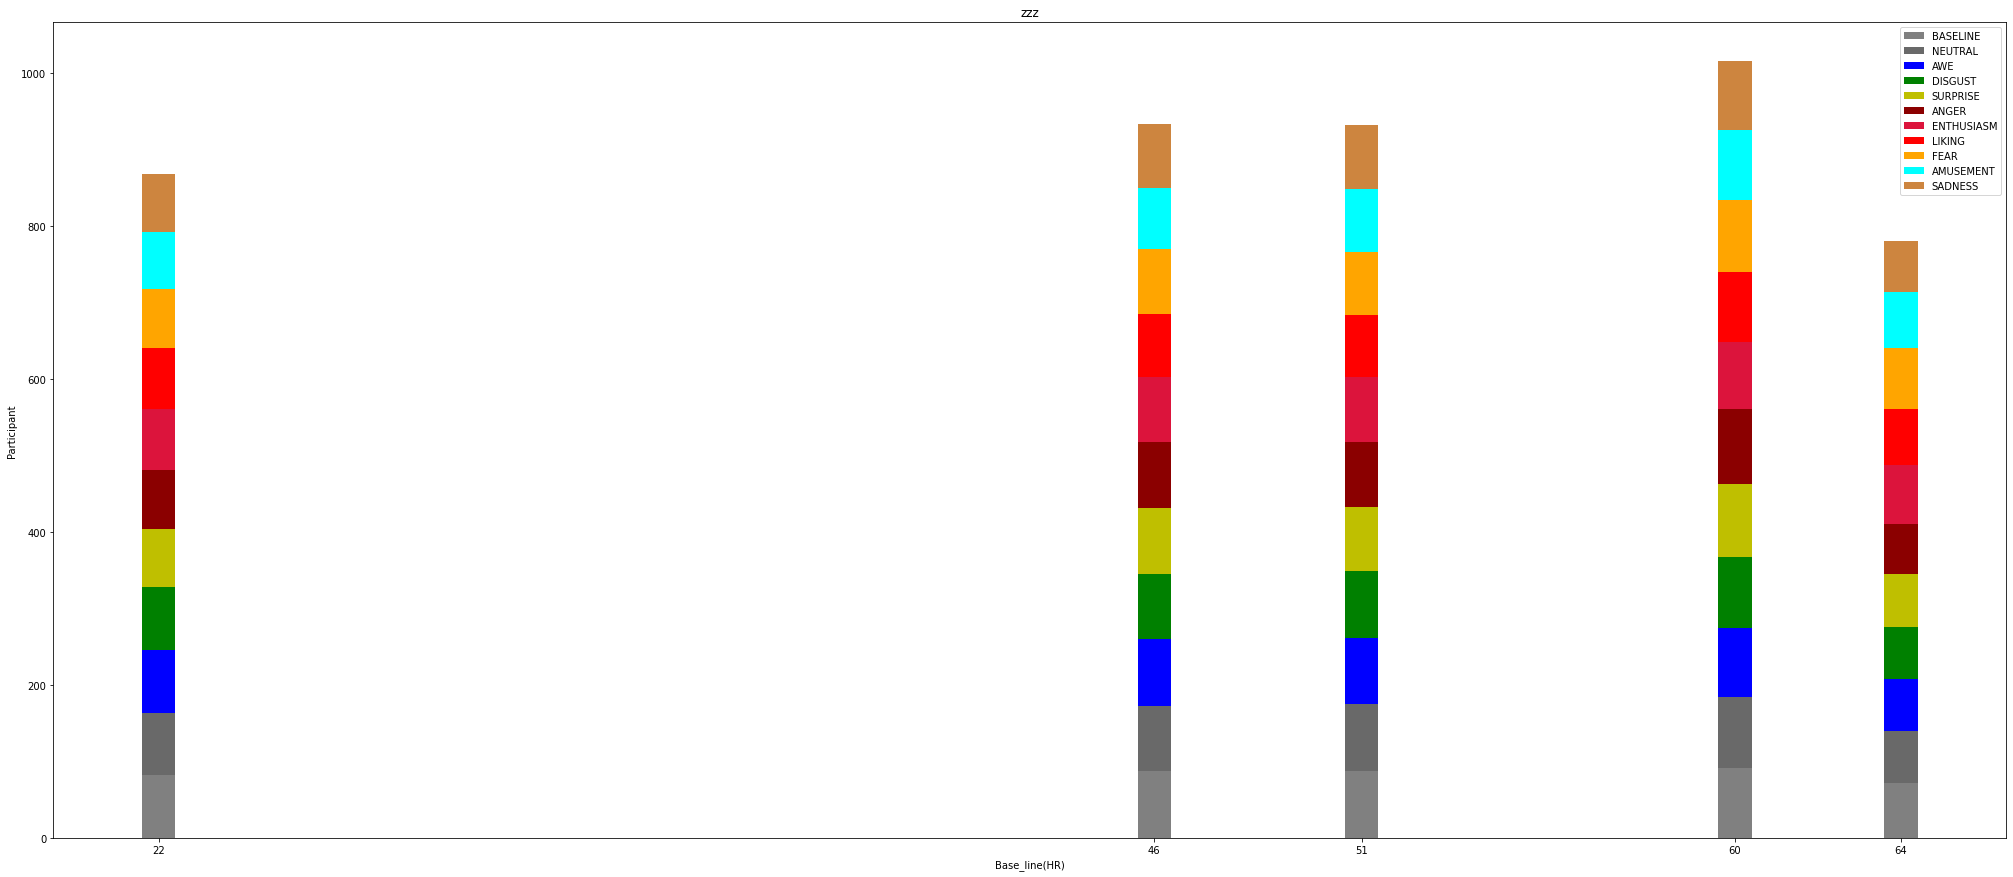

In [470]:
#plt.figure(figsize=(35,15))
#plt.bar(x, b, color='gray')
#plt.bar(x, n, bottom=b, color='dimgray')
#plt.bar(x, awe, bottom=b+n, color='b')
#plt.bar(x, dis, bottom=b+n+awe, color='g')
#plt.bar(x, surr, bottom=b+n+awe+dis, color='y')
#plt.bar(x, anger, bottom=b+n+awe+dis+surr, color='darkred')
#plt.bar(x, enth, bottom=b+n+awe+dis+surr+anger, color='crimson')
#plt.bar(x, liking, bottom=b+n+awe+dis+surr+anger+enth, color='r')
#plt.bar(x, fear, bottom=b+n+awe+dis+surr+anger+enth+liking, color='orange')
#plt.bar(x, amusement, bottom=b+n+awe+dis+surr+anger+enth+liking+fear, color='cyan')
#plt.bar(x, sad, bottom=b+n+awe+dis+surr+anger+enth+liking+fear+amusement, color='peru')
#
#plt.xlabel("Base_line(HR)")
#plt.ylabel("Participant")
#plt.xticks([22,46,51,60,64], x)
#plt.legend(target,loc='upper left')
#plt.title("zzz" loc ='left')
#plt.show()
